#### Notebook dedicated to demonstrating basic pandas functionality
##### Topics shown include:
1. Creating and manipulating Series objects
2. Creating and loading Dataframe objects
3. Manipulating Dataframe objects including:
    * mathematical operations
    * slicing and dicing
    * merging dataframes
    * indexing dataframes
    * group by operations
    * indexing, stacking/unstacking
    * pivot table operations
    * more

In [1]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt

Pandas Series

In [2]:
s = pd.Series([7, 'Hola'])

In [3]:
#Add arbitrary index - otherwise index will be numeric
s = pd.Series([7, 'Hola',8,9,1], index=['A','2','3','4','5'])
s

A       7
2    Hola
3       8
4       9
5       1
dtype: object

In [4]:
#Series from dictionary - keys will be the index
d = {'key1':'1', '2':'2', 'three':'three', '4':'four', 'San Diego': 5}
pd.Series(d)

2                2
4             four
San Diego        5
key1             1
three        three
dtype: object

In [5]:
#Use index to select specific series item:
s['2']

'Hola'

In [6]:
#Can also select multiple items with index labels
s[['2','A']]

2    Hola
A       7
dtype: object

In [7]:
#Use boolean indexing for row selection
s[s<7]

5    1
dtype: object

In [8]:
#the above works by passing a series of true false values as index to the original series
[s<7]

[A    False
 2    False
 3    False
 4    False
 5     True
 dtype: bool]

In [9]:
#the boolean series can be passed as mask - notice we are not using brackets to create the actual mask series 
mask = s<7
s[mask]

5    1
dtype: object

In [10]:
#retrieve and change values based on index:
print 'Old: ', s['A']
s['A'] ='new_val'
print 'New: ', s['A']

Old:  7
New:  new_val


In [11]:
#assign values based on boolean mask:
s[s<7] = 1000
print s[s>7]
#the command below will now return an emtpy series:
print s[s<7]

A    new_val
2       Hola
3          8
4          9
5       1000
dtype: object
Series([], dtype: object)


In [12]:
#use in command to check whether element is in pd series index:
print 'Old' in s
print '7' in s
print 1000 in s #this checks the index -- not the pd series values, therefore this will return false
print 'A' in s

False
False
False
True


In [13]:
#it's possible to divide all values in a series by a scalar, as long as all values are int
new = pd.Series([i for i in range(10)])
new/2

0    0.0
1    0.5
2    1.0
3    1.5
4    2.0
5    2.5
6    3.0
7    3.5
8    4.0
9    4.5
dtype: float64

In [14]:
#similar mathematical operations are also allowed:
np.sqrt(new)

0    0.000000
1    1.000000
2    1.414214
3    1.732051
4    2.000000
5    2.236068
6    2.449490
7    2.645751
8    2.828427
9    3.000000
dtype: float64

In [15]:
#To take the union of two series, you can add them with the plus operator, similarly to how one can merge lists:
#The index values will be unioned i.e. overlapping items will just show up once, while series values will be summed if the index matches
countries = pd.Series([i for i in range(4)],index=['Canada', 'France','Germany','England'])
continents = pd.Series([i for i in range(4)],index=['Antarctica', 'America', 'Europe', 'England'])
print countries + countries
print '----'
#notice that when indices do not overlap, the resulting value will be null
print countries + continents

Canada     0
France     2
Germany    4
England    6
dtype: int64
----
America       NaN
Antarctica    NaN
Canada        NaN
England       6.0
Europe        NaN
France        NaN
Germany       NaN
dtype: float64


In [16]:
#null checking:
continents.notnull()

Antarctica    True
America       True
Europe        True
England       True
dtype: bool

In [17]:
#the boolean resulting from null checks can also be used as mask:
print(continents[continents.notnull()])
print '----'
print(continents[continents.isnull()])

Antarctica    0
America       1
Europe        2
England       3
dtype: int64
----
Series([], dtype: int64)


In [164]:
#using the endswith method allows to select instances based on regex pattern
continents[[name.endswith('erica') for name in continents.index]]
#the startswith method is used similarly to return the initial characters of the values in a series

America    1
dtype: int64

In [167]:
#one can use list comprehension to query a series index or values
print continents[[i for i in continents.index]]
print '---'
print continents[[i for i in continents.values]]
#notice that in both cases the entire series is retrieved - it's because we are passing the selection to the original series

Antarctica    0
America       1
Europe        2
England       3
dtype: int64
---
Antarctica    0
America       1
Europe        2
England       3
dtype: int64


In [169]:
#if we just wanted the values we could simply use list comprehension directly and select form the Series index or values objects
print "Series index: ", [i for i in continents.index]
print "Series values: ", [i for i in continents.values]

Series index:  ['Antarctica', 'America', 'Europe', 'England']
Series values:  [0, 1, 2, 3]


#### Dataframes

##### Dataframe creation methods shown:
    1. Dataframes from dictionary
    2. Dataframes from list of dictionaries
    3. Dataframes from csv
    4. Dataframes from excel

##### Additional Dataframe methods shown:
    1. Dataframe to csv
    2. Dataframe to excel

In [18]:
#You can create a df from a python dictionary:
d = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}

In [140]:
#you can create a df from a list of dictionaries but each key in each df needs to be the same:
#also, each key value pair represents a column value instance, not the entire row as when creating a df from a single dictionary
e = {'year':[i for i in range(8)],
    'col6': [i+1 for i in range(8)]}
#otherwise the end result will be to obtain additional columns for additional keys, and entire lists will be passed into the new df as single instance values

In [141]:
d_list = [d,e]

In [142]:
df_from_list_of_dictionaries = pd.DataFrame(d_list)
#df obtained this way will have entire list as single instance value
df_from_list_of_dictionaries

,col6,losses,team,wins,year
0,NaN,"[5, 8, 6, 1, 5, 10, 6, 12]","[Bears, Bears, Bears, Packers, Packers, Lions,...","[11, 8, 10, 15, 11, 6, 10, 4]","[2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012]"
1,"[1, 2, 3, 4, 5, 6, 7, 8]",NaN,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]"


In [145]:
#df obtained this way will have the correct key-value pairs for each df instance value:
f = [{'col1':1, 'col2':'two', 'col3':'three'},
     {'col1':2, 'col2':'two', 'col3':'three'},
     {'col1':3, 'col2':'two', 'col3':'three'},
     {'col1':4, 'col2':'two', 'col3':'three'}]

df_from_list_of_dictionaries = pd.DataFrame(f)
df_from_list_of_dictionaries

,col1,col2,col3
0,1,two,three
1,2,two,three
2,3,two,three
3,4,two,three


In [19]:
#You can either pass the dictionary keys to the column parameter or leave it blank and it will use them by default as column names
football = pd.DataFrame(d)
#football = pd.DataFrame(d, columns = d.keys())
#football = pd.DataFrame(d, columns = ['year','team','wins','losses'])

In [20]:
football

,losses,team,wins,year
0,5,Bears,11,2010
1,8,Bears,8,2011
2,6,Bears,10,2012
3,1,Packers,15,2011
4,5,Packers,11,2012
5,10,Lions,6,2010
6,6,Lions,10,2011
7,12,Lions,4,2012


In [21]:
#loading a csv file with the read_csv command:
sample_csv = pd.read_csv('FL_insurance_sample.csv')
#By default it will use the first row as header but set the 'header' parameter to None if you don't need the header

In [191]:
#notice we can also load files and directly apply 
#a substitution for values that are off but aren't detected as 'na' with the na_vlaues argument
sample_csv = pd.read_csv('FL_insurance_sample.csv', na_values = ['?', -9999])
#this will show instances of question marks or integers of value of -9999 as 'na'

In [22]:
#we can also write a dataframe to a csv file with to_csv:
football.to_csv('football_sample.csv')

In [23]:
#we can also write the df to excel:
#make sure to set the index parameter if you want to discard the index column
football.to_excel('football_sample.xlsx', index=False)

In [24]:
#deleting the df from the notebook:
del football

In [172]:
#reloading it from excel with xlsx libeary:
football = pd.read_excel('football_sample.xlsx', 'Sheet1')

In [173]:
#when csv files contain unwanted characters such as dollar signs, one can use converter functions in the read_csv command to immediately clean up the input file:
listings = pd.read_csv('listings.csv', converters={'price': lambda x: x.replace('$','')})

In [174]:
#the dollar sign is no longer present
listings.price.head()

0     49.00
1     59.00
2    150.00
3    120.00
4     70.00
Name: price, dtype: object

One can modify df values by direct assignment as in lists:

In [183]:
football = pd.DataFrame(d)
football.columns

Index([u'losses', u'team', u'wins', u'year'], dtype='object')

In [184]:
#notice here index selection is exact: in other words, we will modify rows with index 2,3,and 5 (not 1,2 and 4)
#notice this could be done without loc but it is now deprecated to do it without it
football.losses.loc[[2,3,5]] = [12, 14, 2]

In [185]:
football

,losses,team,wins,year
0,5,Bears,11,2010
1,8,Bears,8,2011
2,12,Bears,10,2012
3,14,Packers,15,2011
4,5,Packers,11,2012
5,2,Lions,6,2010
6,6,Lions,10,2011
7,12,Lions,4,2012


In [186]:
#we can create new columns simply by instantiating one separately:
#if we assign a single value we will have a new column with the same value across all rows
football['new_column'] = 1
football

,losses,team,wins,year,new_column
0,5,Bears,11,2010,1
1,8,Bears,8,2011,1
2,12,Bears,10,2012,1
3,14,Packers,15,2011,1
4,5,Packers,11,2012,1
5,2,Lions,6,2010,1
6,6,Lions,10,2011,1
7,12,Lions,4,2012,1


In [187]:
#alternatively, we can pass a list or a pd.Series object:
football['col_from_list'] = [i for i in range(len(football))]
football['col_from_pdseries'] = pd.Series([i+1 for i in range(len(football))])
football

,losses,team,wins,year,new_column,col_from_list,col_from_pdseries
0,5,Bears,11,2010,1,0,1
1,8,Bears,8,2011,1,1,2
2,12,Bears,10,2012,1,2,3
3,14,Packers,15,2011,1,3,4
4,5,Packers,11,2012,1,4,5
5,2,Lions,6,2010,1,5,6
6,6,Lions,10,2011,1,6,7
7,12,Lions,4,2012,1,7,8


In [188]:
#we can delete single columns or entire df with the delete command:
del football['new_column']
football

,losses,team,wins,year,col_from_list,col_from_pdseries
0,5,Bears,11,2010,0,1
1,8,Bears,8,2011,1,2
2,12,Bears,10,2012,2,3
3,14,Packers,15,2011,3,4
4,5,Packers,11,2012,4,5
5,2,Lions,6,2010,5,6
6,6,Lions,10,2011,6,7
7,12,Lions,4,2012,7,8


In [189]:
#an alternative way to remove columns is using the drop method:
football.drop('wins', axis=1)
football

,losses,team,wins,year,col_from_list,col_from_pdseries
0,5,Bears,11,2010,0,1
1,8,Bears,8,2011,1,2
2,12,Bears,10,2012,2,3
3,14,Packers,15,2011,3,4
4,5,Packers,11,2012,4,5
5,2,Lions,6,2010,5,6
6,6,Lions,10,2011,6,7
7,12,Lions,4,2012,7,8


In [190]:
#one could use the drop method to also drop rows:
#in this example, we drop the row such that its index is 0
football.drop(0, axis=0)

,losses,team,wins,year,col_from_list,col_from_pdseries
1,8,Bears,8,2011,1,2
2,12,Bears,10,2012,2,3
3,14,Packers,15,2011,3,4
4,5,Packers,11,2012,4,5
5,2,Lions,6,2010,5,6
6,6,Lions,10,2011,6,7
7,12,Lions,4,2012,7,8


In [181]:
#note that startswith and endswith methods demonstrated in the series section also apply to df:
football[[i.startswith('Be') for i in football.team]]

,losses,team,wins,year,col_from_list,col_from_pdseries
0,5,Bears,11,2010,0,1
1,8,Bears,8,2011,1,2
2,12,Bears,10,2012,2,3


In [ ]:
football[[i.startswith('Be') for i in football.team]]

In [182]:
del football

Playing with Dataframes

In [28]:
sample_csv.dtypes

policyID                int64
statecode              object
county                 object
eq_site_limit         float64
hu_site_limit         float64
fl_site_limit         float64
fr_site_limit         float64
tiv_2011              float64
tiv_2012              float64
eq_site_deductible    float64
hu_site_deductible    float64
fl_site_deductible    float64
fr_site_deductible      int64
point_latitude        float64
point_longitude       float64
line                   object
construction           object
point_granularity       int64
dtype: object

In [29]:
sample_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36634 entries, 0 to 36633
Data columns (total 18 columns):
policyID              36634 non-null int64
statecode             36634 non-null object
county                36634 non-null object
eq_site_limit         36634 non-null float64
hu_site_limit         36634 non-null float64
fl_site_limit         36634 non-null float64
fr_site_limit         36634 non-null float64
tiv_2011              36634 non-null float64
tiv_2012              36634 non-null float64
eq_site_deductible    36634 non-null float64
hu_site_deductible    36634 non-null float64
fl_site_deductible    36634 non-null float64
fr_site_deductible    36634 non-null int64
point_latitude        36634 non-null float64
point_longitude       36634 non-null float64
line                  36634 non-null object
construction          36634 non-null object
point_granularity     36634 non-null int64
dtypes: float64(11), int64(3), object(4)
memory usage: 5.0+ MB


In [30]:
#df descriptive stats
sample_csv.describe()

,policyID,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,point_granularity
count,36634.000000,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,3.663400e+04,36634.000000,36634.000000,36634.000000,36634.000000,36634.000000
mean,548661.937189,7.314780e+05,2.074348e+06,6.646009e+05,9.911724e+05,2.172875e+06,2.571004e+06,7.787908e+02,7.037985e+03,192.453210,26.483594,28.087477,-81.903565,1.640907
std,259912.926494,1.752300e+07,1.964150e+07,1.746114e+07,1.767178e+07,2.015015e+07,2.036777e+07,4.787979e+04,9.582593e+04,8037.713716,4702.740932,1.647734,1.809066,1.070561
min,100074.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01,7.337000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,24.547514,-87.447290,1.000000
25%,323647.750000,0.000000e+00,4.248106e+04,0.000000e+00,0.000000e+00,4.562415e+04,5.401351e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,26.471996,-82.439331,1.000000
50%,548525.000000,0.000000e+00,1.926911e+05,0.000000e+00,0.000000e+00,2.021051e+05,2.416310e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,28.057077,-81.585700,1.000000
75%,774252.000000,0.000000e+00,9.163381e+05,0.000000e+00,5.741010e+04,9.465821e+05,1.128871e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,29.623005,-80.372910,3.000000
max,999971.000000,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,2.160000e+09,1.701000e+09,6.273765e+06,7.380000e+06,450000.000000,900000.000000,30.989820,-80.033257,7.000000


In [31]:
sample_csv.head(3)

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.0,498960.0,498960.0,498960.0,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.3,1322376.3,1322376.3,1322376.3,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.4,190724.4,190724.4,190724.4,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1


In [32]:
sample_csv.tail(3)

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
36631,791209,FL,PINELLAS COUNTY,173286.9,173286.9,0.0,0.0,173286.9,205527.97,0.0,0.0,0.0,0,28.110550,-82.766360,Residential,Wood,4
36632,322627,FL,PINELLAS COUNTY,1499781.6,1499781.6,0.0,0.0,1499781.6,1768782.43,0.0,0.0,0.0,0,28.089415,-82.697411,Residential,Masonry,3
36633,398149,FL,PINELLAS COUNTY,373488.3,373488.3,0.0,0.0,373488.3,596003.67,0.0,0.0,0.0,0,28.064440,-82.774590,Residential,Masonry,1


Slicing

In [33]:
#instances from row 10 to 14
sample_csv[10:15]

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
10,253816,FL,CLAY COUNTY,831498.3,831498.30,831498.3,831498.3,831498.30,1117791.48,0.0,0.0,0.0,0,30.102160,-81.719444,Residential,Masonry,1
11,894922,FL,CLAY COUNTY,0.0,24059.09,0.0,0.0,24059.09,33952.19,0.0,0.0,0.0,0,30.095957,-81.695099,Residential,Wood,1
12,422834,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,66755.39,0.0,0.0,0.0,0,30.100073,-81.739822,Residential,Wood,1
13,582721,FL,CLAY COUNTY,0.0,28869.12,0.0,0.0,28869.12,42826.99,0.0,0.0,0.0,0,30.092480,-81.725167,Residential,Wood,1
14,842700,FL,CLAY COUNTY,0.0,56135.64,0.0,0.0,56135.64,50656.80,0.0,0.0,0.0,0,30.101356,-81.726248,Residential,Wood,1


In [34]:
#instances from column 1 to column 5 and row 10 to 15:
sample_csv.iloc[10:15,1:6]

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit
10,FL,CLAY COUNTY,831498.3,831498.30,831498.3
11,FL,CLAY COUNTY,0.0,24059.09,0.0
12,FL,CLAY COUNTY,0.0,48115.94,0.0
13,FL,CLAY COUNTY,0.0,28869.12,0.0
14,FL,CLAY COUNTY,0.0,56135.64,0.0


In [35]:
#selecting the ninth instance (where index 10)
sample_csv.iloc[10]

policyID                   253816
statecode                      FL
county                CLAY COUNTY
eq_site_limit              831498
hu_site_limit              831498
fl_site_limit              831498
fr_site_limit              831498
tiv_2011                   831498
tiv_2012              1.11779e+06
eq_site_deductible              0
hu_site_deductible              0
fl_site_deductible              0
fr_site_deductible              0
point_latitude            30.1022
point_longitude          -81.7194
line                  Residential
construction              Masonry
point_granularity               1
Name: 10, dtype: object

In [36]:
#Manually selecting particular instances based on index position
sample_csv.iloc[[1,2,12]]

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
12,422834,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,66755.39,0.0,0.0,0.0,0,30.100073,-81.739822,Residential,Wood,1


Selecting

In [37]:
#selecting one column:
sample_csv['statecode'].head()

0    FL
1    FL
2    FL
3    FL
4    FL
Name: statecode, dtype: object

In [38]:
#selecting multiple columns:
sample_csv[['statecode', 'county']].head()

,statecode,county
0,FL,CLAY COUNTY
1,FL,CLAY COUNTY
2,FL,CLAY COUNTY
3,FL,CLAY COUNTY
4,FL,CLAY COUNTY


In [39]:
#select instances where latitude > 30:
sample_csv[sample_csv.point_latitude>30].head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [40]:
#multiple select conditions:
sample_csv[(sample_csv.statecode=='FL') & (sample_csv.point_longitude!=20)].head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [41]:
#set index using existing column e.g. policy_id:
sample_csv.set_index('policyID').head()

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
policyID,,,,,,,,,,,,,,,,,
119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [42]:
#use the inplace parameter if you want to modify the df on the spot as the above actually didn't modify the original df:
sample_csv.set_index('policyID', inplace=True)

In [43]:
#to reset the index use reset_index - the inplace parameter has the same functionality
#sample_csv.reset_index(inplace=True)

In [44]:
sample_csv.head()

,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
policyID,,,,,,,,,,,,,,,,,
119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [45]:
#use loc command to select instances by label:
#we use a random policyid for this example as the index has been set to policy id - loc normally uses index for position
sample_csv.loc[333743]

statecode                      FL
county                CLAY COUNTY
eq_site_limit                   0
hu_site_limit             79520.8
fl_site_limit                   0
fr_site_limit                   0
tiv_2011                  79520.8
tiv_2012                  86854.5
eq_site_deductible              0
hu_site_deductible              0
fl_site_deductible              0
fr_site_deductible              0
point_latitude            30.0632
point_longitude          -81.7077
line                  Residential
construction                 Wood
point_granularity               3
Name: 333743, dtype: object

In [46]:
sample_csv.reset_index(inplace=True)

#### Use loc for label based positioning and slicing
#### Use iloc for positional indexing and slicing

Joining dataframes: normally will use concat or merge methods

In [47]:
df1 = pd.DataFrame({'col1':[i for i in range(10)],'col2':[i+10 for i in range(0,20,2)]})

In [48]:
df2 = pd.DataFrame({'col1':[np.sqrt(i) for i in range(0,20,2)],'colB':[np.exp(i) for i in range(0,1000,100)]})

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [49]:
df3 = pd.DataFrame({'colA':[np.sqrt(i) for i in range(10)],'colB':[np.exp(i) for i in range(0,100,10)]})

In [50]:
#inner join demo - the columns joined on match in name
pd.merge(df1,df2, on='col1', how='inner')

,col1,col2,colB
0,0,10,1.000000e+00
1,2,14,7.225974e+86
2,4,18,inf


In [51]:
#left outer join demo - the columns joined on match in name
pd.merge(df1,df2, on='col1', how='left')

,col1,col2,colB
0,0,10,1.000000e+00
1,1,12,NaN
2,2,14,7.225974e+86
3,3,16,NaN
4,4,18,inf
5,5,20,NaN
6,6,22,NaN
7,7,24,NaN
8,8,26,NaN
9,9,28,NaN


In [52]:
#right outer join demo - the columns joined on match in name
pd.merge(df1,df2, on='col1', how='right')

,col1,col2,colB
0,0.000000,10.0,1.000000e+00
1,2.000000,14.0,7.225974e+86
2,4.000000,18.0,inf
3,1.414214,NaN,2.688117e+43
4,2.449490,NaN,1.942426e+130
5,2.828427,NaN,5.221470e+173
6,3.162278,NaN,1.403592e+217
7,3.464102,NaN,3.773020e+260
8,3.741657,NaN,1.014232e+304
9,4.242641,NaN,inf


In [53]:
#fukk outer join demo - the columns joined on match in name
pd.merge(df1,df2, on='col1', how='outer')

,col1,col2,colB
0,0.000000,10.0,1.000000e+00
1,1.000000,12.0,NaN
2,2.000000,14.0,7.225974e+86
3,3.000000,16.0,NaN
4,4.000000,18.0,inf
5,5.000000,20.0,NaN
6,6.000000,22.0,NaN
7,7.000000,24.0,NaN
8,8.000000,26.0,NaN
9,9.000000,28.0,NaN


With concat, one can combine dataframes more easily

In [54]:
#concatenating three dataframes at a time - notice we are really appending values from all three dataframes
#columns that match in name will be shown once, while any columns that don't match will simply be added horizontally
pd.concat([df1,df2,df3])

,col1,col2,colA,colB
0,0.000000,10.0,NaN,NaN
1,1.000000,12.0,NaN,NaN
2,2.000000,14.0,NaN,NaN
3,3.000000,16.0,NaN,NaN
4,4.000000,18.0,NaN,NaN
5,5.000000,20.0,NaN,NaN
6,6.000000,22.0,NaN,NaN
7,7.000000,24.0,NaN,NaN
8,8.000000,26.0,NaN,NaN
9,9.000000,28.0,NaN,NaN


In [55]:
#concatenating three dataframes can also be done by augmenting the dataframe horizontally via the axis parameter
#this time columns that match in name are not overlapped but simply added horizontally
pd.concat([df1,df2,df3], axis=1)

,col1,col2,col1,colB,colA,colB
0,0,10,0.000000,1.000000e+00,0.000000,1.000000e+00
1,1,12,1.414214,2.688117e+43,1.000000,2.202647e+04
2,2,14,2.000000,7.225974e+86,1.414214,4.851652e+08
3,3,16,2.449490,1.942426e+130,1.732051,1.068647e+13
4,4,18,2.828427,5.221470e+173,2.000000,2.353853e+17
5,5,20,3.162278,1.403592e+217,2.236068,5.184706e+21
6,6,22,3.464102,3.773020e+260,2.449490,1.142007e+26
7,7,24,3.741657,1.014232e+304,2.645751,2.515439e+30
8,8,26,4.000000,inf,2.828427,5.540622e+34
9,9,28,4.242641,inf,3.000000,1.220403e+39


Indexing

In [192]:
# reusing the football df for these examples
football = pd.DataFrame(d)

In [193]:
#reindexing: we can use the reindex method to rearrange the order of the rows
#in this case we are reversing the original order
football.reindex(football.index[::-1]).head()

,losses,team,wins,year
7,12,Lions,4,2012
6,6,Lions,10,2011
5,10,Lions,6,2010
4,5,Packers,11,2012
3,1,Packers,15,2011


In [194]:
football_index = range(football.index.values.min(), football.index.values.max())

In [195]:
football_index

[0, 1, 2, 3, 4, 5, 6]

In [197]:
football.reindex(football_index, method='ffill')

,losses,team,wins,year
0,5,Bears,11,2010
1,8,Bears,8,2011
2,6,Bears,10,2012
3,1,Packers,15,2011
4,5,Packers,11,2012
5,10,Lions,6,2010
6,6,Lions,10,2011


In [198]:
#index based selection
football[1:3]

,losses,team,wins,year
1,8,Bears,8,2011
2,6,Bears,10,2012


In [203]:
#index based value assignment
football[1:3] = 1

ISIN

GroupBy

In [56]:
#groupby returns df groupby object which can be used with standard methods:
#simply returning the object is not enough to show the data
df1.groupby('col1')

In [57]:
#use the count method to show counts by selected column
sample_csv.groupby('county').count().head()

,policyID,statecode,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
county,,,,,,,,,,,,,,,,,
ALACHUA COUNTY,973,973,973,973,973,973,973,973,973,973,973,973,973,973,973,973,973
BAKER COUNTY,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
BAY COUNTY,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403,403
BRADFORD COUNTY,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
BREVARD COUNTY,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872,872


In [58]:
#now we use groupby to apply a ranking to each element:
def ranker(df):
    df['county_rank'] = np.arange(len(df))+1
    return df

In [59]:
sample_csv.sort_values('eq_site_deductible', ascending=False, inplace=True)

In [60]:
#So now we have sorted by county, and ranked each row within each county by the valye in the eq_site_deductible column
sample_csv.groupby('county').apply(ranker).head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,county_rank
2862,937306,FL,DUVAL COUNTY,125100000.0,125100000.0,125100000.0,125100000.0,125100000.0,160200000.0,6273765.0,6273765.0,0.0,0,30.324990,-81.662440,Commercial,Steel Frame,1,1
2863,723566,FL,DUVAL COUNTY,90900000.0,90900000.0,90900000.0,90900000.0,90900000.0,123300000.0,4550895.0,4550895.0,0.0,0,30.328860,-81.660780,Commercial,Steel Frame,1,2
2895,854635,FL,DUVAL COUNTY,70470000.0,70470000.0,70470000.0,70470000.0,70470000.0,64800000.0,3521835.0,3521835.0,0.0,0,30.327970,-81.673140,Commercial,Steel Frame,1,3
12368,996237,FL,SEMINOLE COUNTY,127800000.0,127800000.0,0.0,0.0,127800000.0,174600000.0,2552938.2,2552938.2,0.0,0,28.774035,-81.244881,Commercial,Steel Frame,3,1
2865,166730,FL,DUVAL COUNTY,31500000.0,31500000.0,31500000.0,31500000.0,31500000.0,50220000.0,1575000.0,1575000.0,0.0,0,30.327700,-81.650000,Commercial,Reinforced Concrete,4,4


In [61]:
#using groupby to find the top n by a particular attribute:
#the size method gets the count of rows for each group so in this case we have the count of rows for each category by value of fl_site_limit
sample_csv.groupby('fl_site_limit').size().head()

fl_site_limit
0.0      29040
90.0        21
144.0        1
180.0       20
198.0        4
dtype: int64

In [62]:
#now we do the same as above but we only pick the top 10:
#notice we need the comma to make sure we're picking only the top 10 rows (after we have sorted)
sample_csv.groupby('fl_site_limit').size().sort_values(ascending=False)[:10,]

fl_site_limit
0.0        29040
450.0        183
270.0        113
540.0         75
3825.0        74
243.0         56
22500.0       50
72990.0       45
900.0         41
2700.0        40
dtype: int64

In [63]:
#the value_counts method achieves the same without grouping by:
sample_csv.fl_site_limit.value_counts()[:10,]

0.0        29040
450.0        183
270.0        113
540.0         75
3825.0        74
243.0         56
22500.0       50
72990.0       45
900.0         41
2700.0        40
Name: fl_site_limit, dtype: int64

In [64]:
#using the agg function allows to aggregate based on specific attributes by passing a dictionary:
#this way we have created a hierarchical df where the size and mean attributes are below the hu_site_limit attribute
sample_csv.groupby('fl_site_limit').agg({'hu_site_limit':[np.size, np.mean]}).head()

hu_site_limit              
                       size          mean
fl_site_limit                            
0.0                 29040.0  1.799284e+06
90.0                   21.0  9.000000e+01
144.0                   1.0  1.440000e+02
180.0                  20.0  1.800000e+02
198.0                   4.0  1.980000e+02

In [65]:
#notice you cannot just take a slice of this by appending the index unless you use iloc or a similar method
sample_csv.groupby('fl_site_limit').agg({'hu_site_limit':[np.size, np.mean]}).iloc[:10,]

hu_site_limit              
                       size          mean
fl_site_limit                            
0.0                 29040.0  1.799284e+06
90.0                   21.0  9.000000e+01
144.0                   1.0  1.440000e+02
180.0                  20.0  1.800000e+02
198.0                   4.0  1.980000e+02
207.0                   5.0  2.070000e+02
225.0                   2.0  2.250000e+02
243.0                  56.0  2.430000e+02
270.0                 113.0  2.700000e+02
279.0                  11.0  2.790000e+02

In [66]:
#this new df can be used as any other df to sort on and find additional insights:
stats_df = sample_csv.groupby('fl_site_limit').agg({'hu_site_limit':[np.size, np.mean]})

In [67]:
#notice that sort_values takes two arguments defining the hierarchica structure of the df columns
stats_df.sort_values([('hu_site_limit','mean')], ascending=False).head()

hu_site_limit              
                       size          mean
fl_site_limit                            
2.160000e+09            1.0  2.160000e+09
1.701000e+09            1.0  1.701000e+09
1.017000e+09            1.0  1.017000e+09
6.552000e+08            1.0  6.552000e+08
6.345000e+08            1.0  6.345000e+08

Condition based selection:

In [68]:
#all instances where county = value
sample_csv[sample_csv.county == 'DUVAL COUNTY'].head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
2862,937306,FL,DUVAL COUNTY,125100000.0,125100000.0,125100000.0,125100000.0,125100000.0,160200000.0,6273765.0,6273765.0,0.0,0,30.324990,-81.662440,Commercial,Steel Frame,1
2863,723566,FL,DUVAL COUNTY,90900000.0,90900000.0,90900000.0,90900000.0,90900000.0,123300000.0,4550895.0,4550895.0,0.0,0,30.328860,-81.660780,Commercial,Steel Frame,1
2895,854635,FL,DUVAL COUNTY,70470000.0,70470000.0,70470000.0,70470000.0,70470000.0,64800000.0,3521835.0,3521835.0,0.0,0,30.327970,-81.673140,Commercial,Steel Frame,1
2865,166730,FL,DUVAL COUNTY,31500000.0,31500000.0,31500000.0,31500000.0,31500000.0,50220000.0,1575000.0,1575000.0,0.0,0,30.327700,-81.650000,Commercial,Reinforced Concrete,4
4056,187130,FL,DUVAL COUNTY,9000000.0,9000000.0,9000000.0,9000000.0,9000000.0,12330000.0,450000.0,450000.0,0.0,0,30.394333,-81.546501,Commercial,Reinforced Concrete,1


In [69]:
#first five instances where county equals value
sample_csv[sample_csv.county == 'DUVAL COUNTY'][:5]

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
2862,937306,FL,DUVAL COUNTY,125100000.0,125100000.0,125100000.0,125100000.0,125100000.0,160200000.0,6273765.0,6273765.0,0.0,0,30.324990,-81.662440,Commercial,Steel Frame,1
2863,723566,FL,DUVAL COUNTY,90900000.0,90900000.0,90900000.0,90900000.0,90900000.0,123300000.0,4550895.0,4550895.0,0.0,0,30.328860,-81.660780,Commercial,Steel Frame,1
2895,854635,FL,DUVAL COUNTY,70470000.0,70470000.0,70470000.0,70470000.0,70470000.0,64800000.0,3521835.0,3521835.0,0.0,0,30.327970,-81.673140,Commercial,Steel Frame,1
2865,166730,FL,DUVAL COUNTY,31500000.0,31500000.0,31500000.0,31500000.0,31500000.0,50220000.0,1575000.0,1575000.0,0.0,0,30.327700,-81.650000,Commercial,Reinforced Concrete,4
4056,187130,FL,DUVAL COUNTY,9000000.0,9000000.0,9000000.0,9000000.0,9000000.0,12330000.0,450000.0,450000.0,0.0,0,30.394333,-81.546501,Commercial,Reinforced Concrete,1


Now let's apply condition based slicing on the aggregated df we created earlier i.e. stats_df

In [70]:
#here we select rows based on a condition but we pass two slice attributes because we have a multiindex column:
#notice the first column argument is the top level multi index column, while the second argument is the actual attribute we want to sort on
condition = stats_df['hu_site_limit']['mean'] > 2

In [72]:
#with the above we have returned a mask, which can be applied to obtain the actual slice
print condition.head()
print '----'
#so now we select values where the mean is above the condition specified in the mask, and sort by mean
#notice again we need to use iloc or a similar method if we want to slice the data, and cannot use anything else
print stats_df[condition].sort_values([('hu_site_limit','mean')], ascending=False).iloc[:10]

fl_site_limit
0.0      True
90.0     True
144.0    True
180.0    True
198.0    True
Name: mean, dtype: bool
----
              hu_site_limit              
                       size          mean
fl_site_limit                            
2.160000e+09            1.0  2.160000e+09
1.701000e+09            1.0  1.701000e+09
1.017000e+09            1.0  1.017000e+09
6.552000e+08            1.0  6.552000e+08
6.345000e+08            1.0  6.345000e+08
5.508000e+08            1.0  5.508000e+08
4.086000e+08            1.0  4.086000e+08
3.726000e+08            1.0  3.726000e+08
3.510000e+08            1.0  3.510000e+08
2.943000e+08            1.0  2.943000e+08


In [73]:
#making a series we can use later:
most_50 = sample_csv.groupby('hu_site_limit').size().sort_values(ascending=False).iloc[:50]

In [74]:
most_50.head()

hu_site_limit
0.0         507
116640.0    210
450.0       183
270.0       114
66873.6      89
dtype: int64

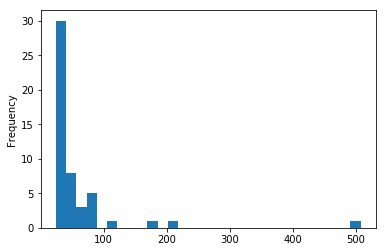

In [75]:
most_50.plot.hist(bins=30)
plt.show()

In [76]:
#Binning based on the above histogram with the cut method:
#notice number of bin labels must be equal to the number of data slices
labels = ['0-200','201-400','401-above']
sample_csv['hsl_bins'] = pd.cut(sample_csv.hu_site_limit, 3, right=False, labels=labels)
sample_csv[['hu_site_limit', 'hsl_bins']][:4]

,hu_site_limit,hsl_bins
2862,125100000.0,0-200
2863,90900000.0,0-200
2895,70470000.0,0-200
12368,127800000.0,0-200


In [77]:
#with this new feature we can perform the same kind of aggregations, this time based on the bins though:
sample_csv.groupby('hsl_bins').agg({'hu_site_limit': [np.size, np.mean]})

hu_site_limit              
                   size          mean
hsl_bins                             
0-200           36630.0  1.917474e+06
201-400             2.0  9.468000e+08
401-above           2.0  1.930500e+09

In [78]:
sample_csv.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,hsl_bins
2862,937306,FL,DUVAL COUNTY,125100000.0,125100000.0,125100000.0,125100000.0,125100000.0,160200000.0,6273765.0,6273765.0,0.0,0,30.324990,-81.662440,Commercial,Steel Frame,1,0-200
2863,723566,FL,DUVAL COUNTY,90900000.0,90900000.0,90900000.0,90900000.0,90900000.0,123300000.0,4550895.0,4550895.0,0.0,0,30.328860,-81.660780,Commercial,Steel Frame,1,0-200
2895,854635,FL,DUVAL COUNTY,70470000.0,70470000.0,70470000.0,70470000.0,70470000.0,64800000.0,3521835.0,3521835.0,0.0,0,30.327970,-81.673140,Commercial,Steel Frame,1,0-200
12368,996237,FL,SEMINOLE COUNTY,127800000.0,127800000.0,0.0,0.0,127800000.0,174600000.0,2552938.2,2552938.2,0.0,0,28.774035,-81.244881,Commercial,Steel Frame,3,0-200
2865,166730,FL,DUVAL COUNTY,31500000.0,31500000.0,31500000.0,31500000.0,31500000.0,50220000.0,1575000.0,1575000.0,0.0,0,30.327700,-81.650000,Commercial,Reinforced Concrete,4,0-200


In [79]:
#now we can use a boolean series "most_50" to filter our binned rows
#we are looking at the same binned df as above, this time only considering the top 50 rows though
sample_csv.set_index('hu_site_limit', inplace=True)

In [80]:
by_hsl = sample_csv.loc[most_50.index].groupby(['county', 'hsl_bins'])

In [81]:
#now we can compare aggregate values, but only with rows in the top 50 as filtered above
by_hsl.eq_site_limit.mean().head()

county           hsl_bins
ALACHUA COUNTY   0-200        50022.956250
BAY COUNTY       0-200         8763.157895
BRADFORD COUNTY  0-200        63495.000000
BREVARD COUNTY   0-200       239635.948101
BROWARD COUNTY   0-200        53630.000000
Name: eq_site_limit, dtype: float64

In [82]:
#The above works but it would be easier to see rows in table form as original
#the unstack command allows to do that:
#in a way, we are moving the column at column index 1 i.e. hsl_bins out of the multi index and creating a column for each index value
by_hsl.eq_site_limit.mean().unstack(1).head()

hsl_bins,0-200
county,
ALACHUA COUNTY,50022.956250
BAY COUNTY,8763.157895
BRADFORD COUNTY,63495.000000
BREVARD COUNTY,239635.948101
BROWARD COUNTY,53630.000000


In [83]:
#now we unstack the column at column index 0 i.e. the county, in other words we turn the index values into column names
by_hsl.eq_site_limit.mean().unstack(0).head()

county,ALACHUA COUNTY,BAY COUNTY,BRADFORD COUNTY,BREVARD COUNTY,BROWARD COUNTY,CHARLOTTE COUNTY,CITRUS COUNTY,CLAY COUNTY,COLLIER COUNTY,COLUMBIA COUNTY,...,SARASOTA COUNTY,SEMINOLE COUNTY,ST JOHNS COUNTY,SUMTER COUNTY,TAYLOR COUNTY,UNION COUNTY,VOLUSIA COUNTY,WAKULLA COUNTY,WALTON COUNTY,WASHINGTON COUNTY
hsl_bins,,,,,,,,,,,,,,,,,,,,,
0-200,50022.95625,8763.157895,63495.0,239635.948101,53630.0,471070.4625,6802.5,0.0,1.692354e+06,39375.0,...,166558.366667,96921.428571,69353.355224,0.0,0.0,54000.0,63406.422754,9000.0,9266.4,0.0


In [84]:
#using the stack command we obtain the inverse: we create index values from columns passed into the command:
test = by_hsl.eq_site_limit.mean().unstack(0)

In [85]:
by_hsl.eq_site_limit.mean().head()

county           hsl_bins
ALACHUA COUNTY   0-200        50022.956250
BAY COUNTY       0-200         8763.157895
BRADFORD COUNTY  0-200        63495.000000
BREVARD COUNTY   0-200       239635.948101
BROWARD COUNTY   0-200        53630.000000
Name: eq_site_limit, dtype: float64

In [86]:
test.stack(0).head()

hsl_bins  county         
0-200     ALACHUA COUNTY      50022.956250
          BAY COUNTY           8763.157895
          BRADFORD COUNTY     63495.000000
          BREVARD COUNTY     239635.948101
          BROWARD COUNTY      53630.000000
dtype: float64

In [87]:
#we unstack and restack the by_hsl.eq_site_limit.mean() df to compare results
#notice the outcome is similar, but the index hierarchy is inverse: the county was originally first and the bins were second in hte hiearchy
#now the bins are first and the county is second in the hierarchy

In [88]:
by_hsl.eq_site_limit.mean().index

MultiIndex(levels=[[u'ALACHUA COUNTY', u'BAY COUNTY', u'BRADFORD COUNTY', u'BREVARD COUNTY', u'BROWARD COUNTY', u'CHARLOTTE COUNTY', u'CITRUS COUNTY', u'CLAY COUNTY', u'COLLIER COUNTY', u'COLUMBIA COUNTY', u'DESOTO COUNTY', u'DIXIE COUNTY', u'DUVAL COUNTY', u'ESCAMBIA COUNTY', u'FLAGLER COUNTY', u'FRANKLIN COUNTY', u'GADSDEN COUNTY', u'GILCHRIST COUNTY', u'GLADES COUNTY', u'GULF COUNTY', u'HAMILTON COUNTY', u'HENDRY COUNTY', u'HERNANDO COUNTY', u'HIGHLANDS COUNTY', u'HILLSBOROUGH COUNTY', u'INDIAN RIVER COUNTY', u'JACKSON COUNTY', u'JEFFERSON COUNTY', u'LAFAYETTE COUNTY', u'LAKE COUNTY', u'LEE COUNTY', u'LEON COUNTY', u'LEVY COUNTY', u'MADISON COUNTY', u'MANATEE COUNTY', u'MARION COUNTY', u'MARTIN COUNTY', u'MIAMI DADE COUNTY', u'MONROE COUNTY', u'NASSAU COUNTY', u'North Fort Myers', u'OKALOOSA COUNTY', u'ORANGE COUNTY', u'PALM BEACH COUNTY', u'PASCO COUNTY', u'PINELLAS COUNTY', u'POLK COUNTY', u'PUTNAM COUNTY', u'SANTA ROSA COUNTY', u'SARASOTA COUNTY', u'SEMINOLE COUNTY', u'ST  JOHNS 

In [89]:
test.stack(0).index

MultiIndex(levels=[[u'0-200'], [u'ALACHUA COUNTY', u'BAY COUNTY', u'BRADFORD COUNTY', u'BREVARD COUNTY', u'BROWARD COUNTY', u'CHARLOTTE COUNTY', u'CITRUS COUNTY', u'CLAY COUNTY', u'COLLIER COUNTY', u'COLUMBIA COUNTY', u'DESOTO COUNTY', u'DIXIE COUNTY', u'DUVAL COUNTY', u'ESCAMBIA COUNTY', u'FLAGLER COUNTY', u'FRANKLIN COUNTY', u'GADSDEN COUNTY', u'GILCHRIST COUNTY', u'GLADES COUNTY', u'GULF COUNTY', u'HAMILTON COUNTY', u'HENDRY COUNTY', u'HERNANDO COUNTY', u'HIGHLANDS COUNTY', u'HILLSBOROUGH COUNTY', u'INDIAN RIVER COUNTY', u'JACKSON COUNTY', u'JEFFERSON COUNTY', u'LAFAYETTE COUNTY', u'LAKE COUNTY', u'LEE COUNTY', u'LEON COUNTY', u'LEVY COUNTY', u'MADISON COUNTY', u'MANATEE COUNTY', u'MARION COUNTY', u'MARTIN COUNTY', u'MIAMI DADE COUNTY', u'MONROE COUNTY', u'NASSAU COUNTY', u'North Fort Myers', u'OKALOOSA COUNTY', u'ORANGE COUNTY', u'PALM BEACH COUNTY', u'PASCO COUNTY', u'PINELLAS COUNTY', u'POLK COUNTY', u'PUTNAM COUNTY', u'SANTA ROSA COUNTY', u'SARASOTA COUNTY', u'SEMINOLE COUNTY', 

More stacking and unstacking:

In [90]:
#let's reset the df to the original index and play some more with stack and unstack
sample_csv.reset_index(inplace=True)
sample_csv.head()

,hu_site_limit,policyID,statecode,county,eq_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,hsl_bins
0,125100000.0,937306,FL,DUVAL COUNTY,125100000.0,125100000.0,125100000.0,125100000.0,160200000.0,6273765.0,6273765.0,0.0,0,30.324990,-81.662440,Commercial,Steel Frame,1,0-200
1,90900000.0,723566,FL,DUVAL COUNTY,90900000.0,90900000.0,90900000.0,90900000.0,123300000.0,4550895.0,4550895.0,0.0,0,30.328860,-81.660780,Commercial,Steel Frame,1,0-200
2,70470000.0,854635,FL,DUVAL COUNTY,70470000.0,70470000.0,70470000.0,70470000.0,64800000.0,3521835.0,3521835.0,0.0,0,30.327970,-81.673140,Commercial,Steel Frame,1,0-200
3,127800000.0,996237,FL,SEMINOLE COUNTY,127800000.0,0.0,0.0,127800000.0,174600000.0,2552938.2,2552938.2,0.0,0,28.774035,-81.244881,Commercial,Steel Frame,3,0-200
4,31500000.0,166730,FL,DUVAL COUNTY,31500000.0,31500000.0,31500000.0,31500000.0,50220000.0,1575000.0,1575000.0,0.0,0,30.327700,-81.650000,Commercial,Reinforced Concrete,4,0-200


In [91]:
#if we stack the original df we will cause the columns to become the index
#in practice, each row will thus have a second level of indexing for each original column
sample_csv.stack()

0      hu_site_limit               1.251e+08
       policyID                       937306
       statecode                          FL
       county                   DUVAL COUNTY
       eq_site_limit               1.251e+08
       fl_site_limit               1.251e+08
       fr_site_limit               1.251e+08
       tiv_2011                    1.251e+08
       tiv_2012                    1.602e+08
       eq_site_deductible        6.27376e+06
       hu_site_deductible        6.27376e+06
       fl_site_deductible                  0
       fr_site_deductible                  0
       point_latitude                 30.325
       point_longitude              -81.6624
       line                       Commercial
       construction              Steel Frame
       point_granularity                   1
       hsl_bins                        0-200
1      hu_site_limit                9.09e+07
       policyID                       723566
       statecode                          FL
       cou

In [92]:
#if we unstack the original df, we will obtain the opposite effect: each member of the index will become a column:
# but because we only had a single level index, the we will obtain a similar result as when we stacked, only the new index hierarchy is inverted:  
sample_csv.unstack()

hu_site_limit  0          1.251e+08
               1           9.09e+07
               2          7.047e+07
               3          1.278e+08
               4           3.15e+07
               5          1.251e+07
               6              9e+06
               7              9e+06
               8              9e+06
               9              9e+06
               10             9e+06
               11         1.818e+07
               12         1.818e+07
               13       6.95651e+06
               14       5.53154e+06
               15         1.188e+07
               16         1.125e+07
               17         1.116e+07
               18          9.54e+06
               19       3.79823e+06
               20        8.8974e+06
               21       3.53399e+06
               22        8.7876e+06
               23        8.5644e+06
               24          3.15e+06
               25        7.6473e+06
               26        7.1622e+06
               27        6.6

In [93]:
#the default level to stack and unstack is -1
#we can pass different levels of stacking as long as we have enough levels in the index 
sample_csv.stack(level=-1)

0      hu_site_limit               1.251e+08
       policyID                       937306
       statecode                          FL
       county                   DUVAL COUNTY
       eq_site_limit               1.251e+08
       fl_site_limit               1.251e+08
       fr_site_limit               1.251e+08
       tiv_2011                    1.251e+08
       tiv_2012                    1.602e+08
       eq_site_deductible        6.27376e+06
       hu_site_deductible        6.27376e+06
       fl_site_deductible                  0
       fr_site_deductible                  0
       point_latitude                 30.325
       point_longitude              -81.6624
       line                       Commercial
       construction              Steel Frame
       point_granularity                   1
       hsl_bins                        0-200
1      hu_site_limit                9.09e+07
       policyID                       723566
       statecode                          FL
       cou

In [94]:
#in our case the index has only one level, so passing 0 and -1 is the same
sample_csv.stack(level=0)

0      hu_site_limit               1.251e+08
       policyID                       937306
       statecode                          FL
       county                   DUVAL COUNTY
       eq_site_limit               1.251e+08
       fl_site_limit               1.251e+08
       fr_site_limit               1.251e+08
       tiv_2011                    1.251e+08
       tiv_2012                    1.602e+08
       eq_site_deductible        6.27376e+06
       hu_site_deductible        6.27376e+06
       fl_site_deductible                  0
       fr_site_deductible                  0
       point_latitude                 30.325
       point_longitude              -81.6624
       line                       Commercial
       construction              Steel Frame
       point_granularity                   1
       hsl_bins                        0-200
1      hu_site_limit                9.09e+07
       policyID                       723566
       statecode                          FL
       cou

In [95]:
#if we pass a higher number we get an error:
sample_csv.stack(1)

IndexError: Too many levels: Index has only 1 level, not 2

In [96]:
#let's create a multi level column axis to demonstrate stacking and unstacking at higher levels:
#multi index objects allow to create index objects with higher hieararchical levels
#multi index objects can be created from tuples, arrays, cross sets of iterables, etc.
multi_cols = pd.MultiIndex.from_tuples([('weight', 'kg'), ('weight', 'pounds')])

In [97]:
multi_cols

MultiIndex(levels=[[u'weight'], [u'kg', u'pounds']],
           labels=[[0, 0], [0, 1]])

In [98]:
#we now use the multi index object above as our column hieararchy, and create a new row index from scratch
df_multi_level = pd.DataFrame([[1,2], [2,4]], index=['cat', 'dog'], columns=multi_cols)

In [99]:
df_multi_level

weight       
        kg pounds
cat      1      2
dog      2      4

In [100]:
#if we wanted to, we could have done the same but passed the multi index object to our row index parameter:
df_multi_level2 = pd.DataFrame([[1,2], [2,4]], index=multi_cols, columns=['cat', 'dog'])

In [101]:
df_multi_level2

cat  dog
weight kg        1    2
       pounds    2    4

In [102]:
#also in alternative, in order to create a hierarchical column index for our demo of stacking and unstacking, 
#we could have used group by and agg methods as we had done previously:
sample_csv.groupby('fl_site_limit').agg({'hu_site_limit':[np.size, np.mean]}).iloc[:2,]

hu_site_limit              
                       size          mean
fl_site_limit                            
0.0                 29040.0  1.799284e+06
90.0                   21.0  9.000000e+01

In [103]:
#now on to more stacking/unstacking:
df_multi_level.unstack()

weight  kg      cat    1
                dog    2
        pounds  cat    2
                dog    4
dtype: int64

In [104]:
#above we just unstacked the column index and thus swapped our columns for our row index
#notice this produced a df identical to df_multi_level2, where we had manually swapped column and row indices
#now let's try stacking the same df:
df_multi_level.stack()

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

In [105]:
#above, we increased the hierarchy level in our index while decreasing it in our column index:
#we no longer have two levels in the column index
#notice this was identical to passing a level of 1
df_multi_level.stack(1)

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

In [106]:
#if we pass a level of 0 we obtain a similar result as the column index level 0 is now part of the row index
#but now the new level in the row index is determined by the original top level column in the column index
#finally, notice that because there is one value in this level, the same value is applied to all row index rows
#in effect, it's almost as if we added a new column to the df except it's part of the row index
df_multi_level.stack(0)

,,kg,pounds
cat,weight,1,2
dog,weight,2,4


In [107]:
#let's use the second df to do something very similar: now we unstack the top level of the row index hiearchy (cats and dogs)
#The weight is thus applied as a new level in the column index hierarchy, but notice it has become the lowest level while it used to be the top level in the row index hierarchy
df_multi_level2.unstack(0)

,cat,dog
,weight,weight
kg,1,2
pounds,2,4


In [108]:
#here is the original df for comparison purposes
df_multi_level2

cat  dog
weight kg        1    2
       pounds    2    4

In [109]:
#finally, notice the reset_index method can be used to denormalize the index:
#now the row index has simply become a new column 
#but its column index value has become part of the top level of the column index hiearchy
df_multi_level.reset_index()

index weight       
            kg pounds
0   cat      1      2
1   dog      2      4

Pivoting in Pandas

In [126]:
#in order to pivot tables we can use the older pivot method, or the newer pivot_table method:
#notice this works well only if there are repeated values in the arrays used as index and columns
#otherwise it will return many nulls
df = pd.DataFrame({'col1':['one','one','two','two'], 
                   'col2':['C','D','C','D'], 
                   'col3':['a','b','c','d']})

df.pivot(index='col2', columns='col1', values='col3')

col1,one,two
col2,,
C,a,c
D,b,d


In [128]:
#a similar method newer in Pandas is pivot_table:
#notice the aggfunc method is mandatory 
pd.pivot_table(df, values='col3', index='col2', columns = 'col1', aggfunc=np.sum)

col1,one,two
col2,,
C,a,c
D,b,d


In [130]:
#notice the aggfunc sum is summing col4 values across col1 and col2 combos
df = pd.DataFrame({'col1':['one','one','two','two','three','three'], 
                   'col2':['C','D','C','D','C','D'], 
                   'col3':['a','b','c','d','e','f'],
                   'col4':[i for i in range(6)]})

pd.pivot_table(df, values='col4', index='col1', columns='col2', aggfunc=np.sum)

col2,C,D
col1,,
one,0,1
three,4,5
two,2,3


In [133]:
#in cases where there is no values in the intersections between columns and index used, method will return null
pd.pivot_table(df, values='col4', index='col2', columns='col3', aggfunc=np.sum)

col3,a,b,c,d,e,f
col2,,,,,,
C,0.0,NaN,2.0,NaN,4.0,NaN
D,NaN,1.0,NaN,3.0,NaN,5.0


In [134]:
#you can also use the df.pivot_table variant (older version of Pandas)
#you can have a multi index object as index in pivot_table:
df.pivot_table(index=['col1','col2'], columns='col3', values='col4')

col3          a    b    c    d    e    f
col1  col2                              
one   C     0.0  NaN  NaN  NaN  NaN  NaN
      D     NaN  1.0  NaN  NaN  NaN  NaN
three C     NaN  NaN  NaN  NaN  4.0  NaN
      D     NaN  NaN  NaN  NaN  NaN  5.0
two   C     NaN  NaN  2.0  NaN  NaN  NaN
      D     NaN  NaN  NaN  3.0  NaN  NaN